# Proyecto 1: Ajuste de curvas para encontrar modelos que nos permitan predecir precios de empresas 
## Simulación Matemática O2022

---

## Integrantes:
- Maximiliano Jiménez Ramírez
- Daniel Ramos Van Der Hoek
- Daniel Sánchez López


---

## Objetivos:

**Obejtivo general:**

En este proyecto, utilizaremos el ***ajuste de curvas*** para encontrar modelos representativos que nos permitan predecir el precio de las acciones de 5 empresas para los siguientes 4 meses, así como utilizar el ajuste de curvas para proponer modelos representativos que mejor se ajusten a los precios de cada empresa, y poder así, obtener las predicciones más precisas posibles. Las empresas presentadas en este proyecto cotizan en la Bolsa de Valores de Nueva York. Las empresas son las siguientes:

1. Apple Inc (AAPL)
2. Microsoft Corp (MSFT)
3. Nike Inc (NKE)
4. Starbucks Corp (SBUX)
5. Tesla Inc (TSLA)

**Objetivos específicos:**

Los datos van a ser obtenidos de páginas financieras, usaremos Yahoo Finance e Investing.com y también nos estaremos apoyando de Factset, y de la página de la NYSE (New York Stock Exchange). Todos los datos sobre los precios de las acciones obtenidos, los acomodaremos en un archivo de excel al que llamaremos, ***PreciosProyecto1.xlsx***. De este archivo de excel nos apoyaremos en la codificación del proyecto.

Se analizará cada empresa por separado, proponiendo diferentes modelos para cada una de las empresas.

Vamos a utilizar los precios al cierre por mes, ya que vamos a obtener una buena representación del ajuste de curvas, y la interpretación de los resultados va a ser más rápida, aparte de que si usamos los precios diarios, tendríamos una gran cantidad de datos y necesitaríamos modelos de mayor grado. Por lo que al momento de codificar, podemos tener problemas con la graficación de los puntos y de los modelos.

Se van a proponer modelos con polinomios de grado 3 como mínimo grado, y modelos con polinomios de grado 7 como máximo, ya que consideramos que, de usar modelos con grados mayores, podríamos estar realizando un sobreajuste (*overfitting*), aparte que consideramos que para los propósitos que tiene este proyecto, un polinomio de grado 7 va a ser suficiente para obtener un modelo representativo.

---

# Apple Inc.

Empezaremos por orden alfabético, por lo tanto, la primera empresa que utilizaremos será Apple.

Los datos de los precios de la accción de Apple en los últimos meses se obtuvieron de *Investing.com* y se cotejaron con *Factset* para verificar los datos.

Primero importamos las librerías para trabajar en el tema de ajuste de curvas. Las librerías que utilzaremos serán:
- Numpy
- Pandas
- Matplotlib (Pyplot)
- Scipy (optimize)

**Modelo que representa el problema:**

Se va a realizar el ajuste de curvas.
Necesitamos las librerías para poder trabajar con ajuste de curvas. Necesitaremos un archivo de excel donde están los precios de la acción de cada empresa y leeremos el archivo de excel utilizando `pandas`. Después vamos a usar `numpy` para ordenar los datos de los precios de las acciones como un arreglo numérico y de esta manera poder trabajar con los datos. Después utilizaremos funciones de python junto con operaciones de álgebra lineal para definir los modelos para realizar el ajuste de curvas. Y al final usaremos `scipy.optimize` para encontrar las betas o los pesos de cada modelo. Y por último usaremos la librería de `matplotlib` para graficar los resultados obtenidos

In [1]:
# Importar librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

- Utilizamos la librería de Pandas `pd.read_excel` para leer el archivo de excel

In [2]:
data1 = pd.read_excel('PreciosProyecto1.xlsx')

- Leemos la variable `data1` 

In [3]:
data1

,Fecha,Precios Apple,Unnamed: 2,Fecha.1,Precios Microsoft,Unnamed: 5,Fecha.2,Precios Nike,Unnamed: 8,Fecha.3,Precios Starbucks,Unnamed: 11,Fecha.4,Precios Tesla
0,01 de enero de 2021,131.96,NaN,01 de enero de 2021,231.96,NaN,01 de enero de 2021,133.59,NaN,01 de enero de 2021,96.81,NaN,01 de enero de 2021,264.51
1,01 de febrero de 2021,121.26,NaN,01 de febrero de 2021,232.38,NaN,01 de febrero de 2021,134.78,NaN,01 de febrero de 2021,108.03,NaN,01 de febrero de 2021,225.17
2,01 de marzo de 2021,122.15,NaN,01 de marzo de 2021,235.77,NaN,01 de marzo de 2021,132.89,NaN,01 de marzo de 2021,109.27,NaN,01 de marzo de 2021,222.64
3,01 de abril de 2021,131.46,NaN,01 de abril de 2021,252.18,NaN,01 de abril de 2021,132.62,NaN,01 de abril de 2021,114.49,NaN,01 de abril de 2021,236.48
4,01 de mayo de 2021,124.61,NaN,01 de mayo de 2021,249.68,NaN,01 de mayo de 2021,136.46,NaN,01 de mayo de 2021,113.88,NaN,01 de mayo de 2021,208.41
5,01 de junio de 2021,136.96,NaN,01 de junio de 2021,270.90,NaN,01 de junio de 2021,154.49,NaN,01 de junio de 2021,111.81,NaN,01 de junio de 2021,226.57
6,01 de julio de 2021,145.86,NaN,01 de julio de 2021,284.91,NaN,01 de julio de 2021,167.51,NaN,01 de julio de 2021,121.43,NaN,01 de julio de 2021,229.07
7,01 de agosto de 2021,151.83,NaN,01 de agosto de 2021,301.88,NaN,01 de agosto de 2021,164.74,NaN,01 de agosto de 2021,117.49,NaN,01 de agosto de 2021,245.24
8,01 de septiembre de 2021,141.50,NaN,01 de septiembre de 2021,281.92,NaN,01 de septiembre de 2021,145.23,NaN,01 de septiembre de 2021,110.31,NaN,01 de septiembre de 2021,258.49
9,01 de octubre de 2021,149.80,NaN,01 de octubre de 2021,331.62,NaN,01 de octubre de 2021,167.29,NaN,01 de octubre de 2021,106.07,NaN,01 de octubre de 2021,371.33


- Convertimos los datos de Apple a una lista, llamando dicha lista como `dataAAPL`

In [4]:
dataAAPL = data1["Precios Apple"]     
dataAAPL

0     131.96
1     121.26
2     122.15
3     131.46
4     124.61
5     136.96
6     145.86
7     151.83
8     141.50
9     149.80
10    165.30
11    177.57
12    174.78
13    165.12
14    174.61
15    157.65
16    148.84
17    136.72
18    162.51
19    157.22
20    156.91
Name: Precios Apple, dtype: float64

- Convertimos la lista a un arreglo de Numpy, para poder manejar los datos y poder realizar el proceso de ajuste de curvas

In [5]:
dataApple = np.array([dataAAPL])

**Empezamos proponiendo un modelo con polinomio de grado 3**

Graficamos los puntos que son los precios de la acción de Apple en los últimos meses

Para ello definimos las siguientes variables:
- ***m:*** Número de puntos o de datos
- ***x:*** Un linspace para graficar los puntos en base al número de datos
- ***y:*** Los puntos "reales" que representan los precios de la acción

Graficamos utilizando `%Matplotlib inline`, `plt.figure`, `plt.scatter`, y `plt.grid`

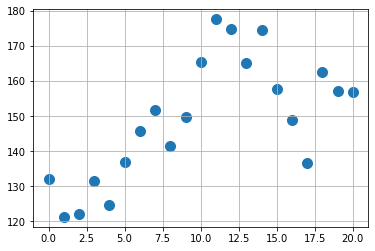

In [6]:
m = 21
x = np.linspace(0, 20, m)
y = dataApple

%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 100)
plt.grid()

- Esta es la distribución de los precio de la acción de Apple, a simple vista podemos interpretar que el precio de Apple ha presentado mucha volatilidad en los últimos meses

- A continuación, definimos una función para optimizar los puntos de los precios con un modelo con un polinomio de grado 3.

In [7]:
def funcion_precios(beta, X, y) :
    beta = np.reshape(beta, [4, -1])
    pred = X @ beta
    return ((y - pred).T @ (y - pred))[0][0]

- Creamos la matriz X para un polinomio de grado 3

In [8]:
# Creamos la matriz X

ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
X = np.hstack((ones, x_1, x_2, x_3))
X

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.200e+01, 1.440e+02, 1.728e+03],
       [1.000e+00, 1.300e+01, 1.690e+02, 2.197e+03],
       [1.000e+00, 1.400e+01, 1.960e+02, 2.744e+03],
       [1.000e+00, 1.500e+01, 2.250e+02, 3.375e+03],
       [1.000e+00, 1.600e+01, 2.560e+02, 4.096e+03],
       [1.000e+00, 1.700e+01, 2.890e+02, 4.913e+03],
       [1.000e+00, 1.800e+01, 3.240e+02, 5.832

A continuación definimos nuestros *vectores/matrices*:
- Beta inicial
- y

In [9]:
beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])

- Obtenemos nuestra multiplicación algebráica de la matriz transpuesta de los precios menos nuestra predicción, por la matriz de los precios menos nuestra predicción.

In [10]:
funcion_precios(beta_inicial, X, y)

57536182.777817056

- Obtenemos los valores o los pesos para cada variable de nuestro modelo de polinomio de grado 3 propuesto utilizando la librería `scipy.optimize`

In [11]:
sol = opt.minimize(funcion_precios, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 1999.5255033411363
 hess_inv: array([[ 2.72021578e-01, -9.90103008e-02,  9.64614976e-03,
        -2.74483868e-04],
       [-9.90103008e-02,  5.35863869e-02, -6.08473568e-03,
         1.87965210e-04],
       [ 9.64614976e-03, -6.08473568e-03,  7.44614690e-04,
        -2.40775222e-05],
       [-2.74483868e-04,  1.87965210e-04, -2.40775222e-05,
         8.02583969e-07]])
      jac: array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 172
      nit: 5
     njev: 34
   status: 2
  success: False
        x: array([ 1.21180358e+02,  2.79213110e+00,  2.52957801e-01, -1.63833092e-02])

- Acomodamos los resultados de nuestro modelo

In [12]:
y_predA1 = X @ sol.x
y_predA1

array([121.18035822, 124.20906381, 127.64538516, 131.39102239,
       135.34767566, 139.41704511, 143.50083089, 147.50073314,
       151.318452  , 154.85568763, 158.01414016, 160.69550974,
       162.80149651, 164.23380063, 164.89412222, 164.68416145,
       163.50561845, 161.26019337, 157.84958635, 153.17549754,
       147.13962709])

- Repetimos el mismo proceso para los demás modelos que vamos a proponer

**Modelo con polinomio de grado 4**

In [13]:
def funcion_precios(beta, X, y) :
    beta = np.reshape(beta, [5, -1])
    pred = X @ beta
    return ((y - pred).T @ (y - pred))[0][0]

In [14]:
# Creamos la matriz X

ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
x_4 = np.reshape(x**4, [m, -1])
X = np.hstack((ones, x_1, x_2, x_3, x_4))
X

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03],
       [1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03],
       [1.00000e+00, 9.00000e+00, 8.10000e+01, 7.29000e+02, 6.56100e+03],
       [1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04],
       [1.00000e+00, 1.10000e+01, 1.21000e+02, 1.33100e+03, 1.46410e+04],
       [1.00000e+00, 1.20000e+01, 1.44000e+02, 1.72800e+03, 2.07360e+04],
       [1.00000e+00, 1.30000e+01, 1.69

In [15]:
beta_inicial = np.random.rand(5)
y = np.reshape(y, [m, -1])

In [16]:
funcion_precios(beta_inicial, X, y)

3254925821.8685775

In [17]:
import scipy.optimize as opt
sol = opt.minimize(funcion_precios, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 1209.8704302082233
 hess_inv: array([[ 3.54228495e-01, -2.04321070e-01,  3.46977045e-02,
        -2.25297604e-03,  4.94590635e-05],
       [-2.04321070e-01,  1.88500048e-01, -3.81791137e-02,
         2.72271759e-03, -6.33653413e-05],
       [ 3.46977045e-02, -3.81791137e-02,  8.37960533e-03,
        -6.27080031e-04,  1.50743323e-05],
       [-2.25297604e-03,  2.72271759e-03, -6.27080031e-04,
         4.84272811e-05, -1.19056437e-06],
       [ 4.94590635e-05, -6.33653413e-05,  1.50743323e-05,
        -1.19056437e-06,  2.97628611e-08]])
      jac: array([-0.00030518, -0.00268555,  0.00086975,  0.00035095,  0.00765991])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 270
      nit: 7
     njev: 43
   status: 2
  success: False
        x: array([ 1.32520063e+02, -1.17383278e+01,  3.71002267e+00, -2.89437134e-01,
        6.82633461e-03])

In [18]:
y_predA2 = X @ sol.x
y_predA2

array([132.5200627 , 124.20914675, 121.67722201, 123.43341373,
       128.15067918, 134.66580766, 141.97942051, 149.25597108,
       155.82374478, 161.17485902, 164.96526326, 167.01473899,
       167.30689972, 165.98919101, 163.37289041, 159.93310756,
       156.30878408, 153.30269364, 151.88144194, 153.17546672,
       158.47903773])

**Modelo con polinomio de grado 5**

In [19]:
def funcion_precios(beta, X, y) :
    beta = np.reshape(beta, [6, -1])
    pred = X @ beta
    return ((y - pred).T @ (y - pred))[0][0]

In [20]:
# Creamos la matriz X

ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
x_4 = np.reshape(x**4, [m, -1])
x_5 = np.reshape(x**5, [m, -1])
X = np.hstack((ones, x_1, x_2, x_3, x_4, x_5))
X

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+04],
       [1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02,
        6.561000e+03, 5.904

In [21]:
beta_inicial = np.random.rand(6)
y = np.reshape(y, [m, -1])

In [22]:
funcion_precios(beta_inicial, X, y)

5010009304843.578

In [23]:
sol = opt.minimize(funcion_precios, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 1179.4031062289187
 hess_inv: array([[ 4.16967989e-01, -3.45370327e-01,  8.87767198e-02,
        -9.69715813e-03,  4.72439140e-04, -8.45590629e-06],
       [-3.45370327e-01,  5.05580036e-01, -1.59753568e-01,
         1.94584559e-02, -1.01431841e-03,  1.90111442e-05],
       [ 8.87767197e-02, -1.59753568e-01,  5.49970574e-02,
        -7.04470335e-03,  3.79748494e-04, -7.29065484e-06],
       [-9.69715813e-03,  1.94584559e-02, -7.04470335e-03,
         9.31946588e-04, -5.13968730e-05,  1.00375652e-06],
       [ 4.72439140e-04, -1.01431841e-03,  3.79748494e-04,
        -5.13968730e-05,  2.88280828e-06, -5.70406975e-08],
       [-8.45590629e-06,  1.90111442e-05, -7.29065484e-06,
         1.00375652e-06, -5.70406975e-08,  1.14042167e-09]])
      jac: array([2.60009766e-02, 1.97143555e-02, 1.76269531e-01, 4.28584290e+00,
       8.36090851e+01, 1.62712720e+03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 271
      nit: 8
     njev: 37
   st

In [24]:
y_predA3 = X @ sol.x
y_predA3

array([131.88017966, 124.5356781 , 122.25725375, 123.87096574,
       128.28280756, 134.489194  , 141.58744815, 148.78628825,
       155.41631472, 160.94049707, 164.96466084, 167.24797454,
       167.7134366 , 166.45836234, 163.76487087, 160.11037206,
       156.17805348, 152.86736733, 151.30451741, 152.85294604,
       159.12382103])

**Modelo con polinomio de grado 6**

In [25]:
def funcion_precios(beta, X, y) :
    beta = np.reshape(beta, [7, -1])
    pred = X @ beta
    return ((y - pred).T @ (y - pred))[0][0]

In [26]:
# Creamos la matriz X

ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
x_4 = np.reshape(x**4, [m, -1])
x_5 = np.reshape(x**5, [m, -1])
x_6 = np.reshape(x**6, [m, -1])
X = np.hstack((ones, x_1, x_2, x_3, x_4, x_5, x_6))
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00,
        1.6000000e+01, 3.2000000e+01, 6.4000000e+01],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00, 2.7000000e+01,
        8.1000000e+01, 2.4300000e+02, 7.2900000e+02],
       [1.0000000e+00, 4.0000000e+00, 1.6000000e+01, 6.4000000e+01,
        2.5600000e+02, 1.0240000e+03, 4.0960000e+03],
       [1.0000000e+00, 5.0000000e+00, 2.5000000e+01, 1.2500000e+02,
        6.2500000e+02, 3.1250000e+03, 1.5625000e+04],
       [1.0000000e+00, 6.0000000e+00, 3.6000000e+01, 2.1600000e+02,
        1.2960000e+03, 7.7760000e+03, 4.6656000e+04],
       [1.0000000e+00, 7.0000000e+00, 4.9000000e+01, 3.4300000e+02,
        2.4010000e+03, 1.6807000e+04, 1.1764900e+05],
       [1.0000000e+00, 8

In [27]:
beta_inicial = np.random.rand(7)
y = np.reshape(y, [m, -1])
funcion_precios(beta_inicial, X, y)

2279568225527663.5

In [28]:
sol = opt.minimize(funcion_precios, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 108931.75930706381
 hess_inv: array([[ 9.99887704e-01, -9.51773494e-04, -4.50076148e-03,
        -1.29276579e-02,  2.33893539e-03, -1.39884802e-04,
         2.77687857e-06],
       [-9.51773494e-04,  9.95103932e-01, -2.19675346e-02,
        -6.54672138e-02,  1.04150339e-02, -5.81911901e-04,
         1.10737297e-05],
       [-4.50076148e-03, -2.19675346e-02,  9.02029165e-01,
        -2.94884431e-01,  3.41783355e-02, -1.68097856e-03,
         2.98496947e-05],
       [-1.29276579e-02, -6.54672138e-02, -2.94884431e-01,
         1.01952458e-01, -1.20384557e-02,  5.97647276e-04,
        -1.06725863e-05],
       [ 2.33893539e-03,  1.04150339e-02,  3.41783355e-02,
        -1.20384557e-02,  1.43003971e-03, -7.12086013e-05,
         1.27394762e-06],
       [-1.39884802e-04, -5.81911901e-04, -1.68097856e-03,
         5.97647276e-04, -7.12086013e-05,  3.55127328e-06,
        -6.35936992e-08],
       [ 2.77687857e-06,  1.10737297e-05,  2.98496947e-05,
        -1.06725863e-05,  1.27394762

In [29]:
y_predA4 = X @ sol.x
y_predA4

array([2.28322149e-01, 4.00956886e+00, 1.91503822e+01, 4.75213699e+01,
       8.57891308e+01, 1.27906832e+02, 1.67146946e+02, 1.97676146e+02,
       2.15672363e+02, 2.19983999e+02, 2.12331302e+02, 1.97049903e+02,
       1.80376506e+02, 1.69276739e+02, 1.69815175e+02, 1.85067492e+02,
       2.12574815e+02, 2.41340199e+02, 2.48367284e+02, 1.94741100e+02,
       2.12510435e+01])

**Polinomio de grado 7**

In [30]:
# Creamos la función de precios

def funcion_precios(beta, X, y) :
    beta = np.reshape(beta, [8, -1])
    pred = X @ beta
    return ((y - pred).T @ (y - pred))[0][0]

In [31]:
# Creamos la matriz X

ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
x_4 = np.reshape(x**4, [m, -1])
x_5 = np.reshape(x**5, [m, -1])
x_6 = np.reshape(x**6, [m, -1])
x_7 = np.reshape(x**7, [m, -1])
X = np.hstack((ones, x_1, x_2, x_3, x_4, x_5, x_6, x_7))
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02, 2.18700000e+03],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03, 1.63840000e+04],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04, 7.81250000e+04],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01, 2.16000000e+02,
        1.29600000e+03, 7.77600000e+03, 4.66560000e+04, 2.

In [32]:
beta_inicial = np.random.rand(8)
y = np.reshape(y, [m, -1])
funcion_precios(beta_inicial, X, y)

1.4719271108795928e+16

In [33]:
sol = opt.minimize(funcion_precios, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 1501969.8111127606
 hess_inv: array([[ 9.99999999e-01, -8.95505783e-09, -8.49465113e-08,
        -7.53157216e-07, -5.73214824e-06, -2.96979293e-05,
         3.13982215e-06, -8.35818396e-08],
       [-8.95505783e-09,  9.99999913e-01, -8.22408901e-07,
        -7.29196021e-06, -5.55019695e-05, -2.87620238e-04,
         2.91791734e-05, -7.50188806e-07],
       [-8.49465113e-08, -8.22408901e-07,  9.99992198e-01,
        -6.91793763e-05, -5.26620017e-04, -2.73011307e-03,
         2.59291155e-04, -6.39574590e-06],
       [-7.53157216e-07, -7.29196021e-06, -6.91793763e-05,
         9.99386509e-01, -4.67114652e-03, -2.42322406e-02,
         2.03972810e-03, -4.71230639e-05],
       [-5.73214824e-06, -5.55019695e-05, -5.26620017e-04,
        -4.67114652e-03,  9.64418263e-01, -1.84829271e-01,
         1.15614379e-02, -2.36721926e-04],
       [-2.96979293e-05, -2.87620238e-04, -2.73011307e-03,
        -2.42322406e-02, -1.84829271e-01,  3.60621508e-02,
        -2.26918738e-03,  4.65997821

In [34]:
y_predA5 = X @ sol.x
y_predA5

array([ 3.95922537e-01,  2.67084907e+00,  1.36242558e+01,  3.85044593e+01,
        7.68582054e+01,  1.21473937e+02,  1.59888236e+02,  1.77637247e+02,
        1.62434908e+02,  1.08459782e+02,  1.99323275e+01, -8.68356028e+01,
       -1.83737209e+02, -2.34331322e+02, -2.01285315e+02, -5.86185059e+01,
        1.90435724e+02,  4.89130943e+02,  6.95653606e+02,  5.43495735e+02,
       -4.07063843e+02])

**Solución y visualización del problema de optimización:**

- Ya que obtuvimos los 5 modelos, pasamos a graficar cada uno, junto con los precios de la acción de Apple

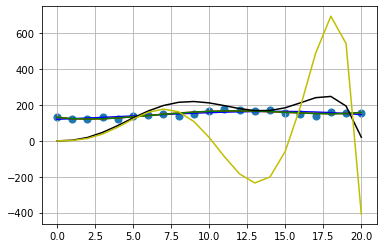

In [35]:
x = np.linspace(0, 20, m)
y = dataApple

plt.figure()
plt.scatter(x, y, s = 50)
plt.plot(x, y_predA1, "b")
plt.plot(x, y_predA2, "r")
plt.plot(x, y_predA3, "g")
plt.plot(x, y_predA4, "black")
plt.plot(x, y_predA5, "y")
plt.grid()

## Análisis de resultados:

Obtenemos la siguiente gráfica. Esta gráfica no representa los precios de la acción de Apple, sólo se puede observar una tendencia bajista de la curva del modelo con polinomio de grado 7, que es la curva amarilla `y_predA5`

Esto puede ser un sobreajuste (*overfitting*) de la función a los puntos reales, por lo que este modelo no es un modelo de los precios de la acción de Apple, y no nos servirá para predecir los precios de los siguientes tres meses.

- Vamos a volver a graficar los precios y los modelos propuestos, esta vez ingorando el modelo `y_predA5`

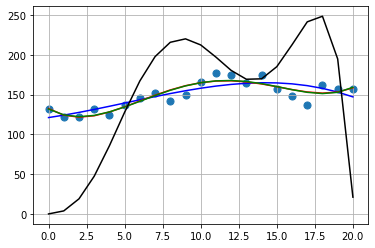

In [36]:
x = np.linspace(0, 20, m)
y = dataApple

plt.figure()
plt.scatter(x, y, s = 50)
plt.plot(x, y_predA1, "b")
plt.plot(x, y_predA2, "r")
plt.plot(x, y_predA3, "g")
plt.plot(x, y_predA4, "black")
#plt.plot(x, y_predA5, "y")
plt.grid()

## Análisis de resultados:

- Obtenemos el siguiente gráfico. El modelo `y_predA4` que es un polinomio de grado 6 no es un modelo representativo de los precios de la acción de Apple, ya que la función se aleja demasiado de los precios y no pasa cerca de casi ninguno de los precios. Por lo tanto no es un buen modelo.

- A continuación vamos a graficar los primeros tres modelos, que son `y_predA1`, `y_predA2`, y `y_predA3`, junto con los precios de la acción de Apple

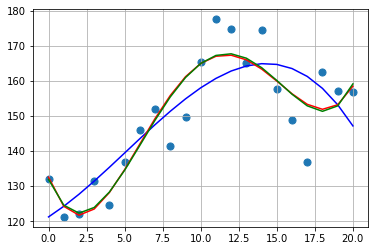

In [37]:
x = np.linspace(0, 20, m)
y = dataApple

plt.figure()
plt.scatter(x, y, s = 50)
plt.plot(x, y_predA1, "b")
plt.plot(x, y_predA2, "r")
plt.plot(x, y_predA3, "g")
#plt.plot(x, y_predA4, "black")
#plt.plot(x, y_predA5, "y")
plt.grid()

## Análisis de resultados:

- Obtenemos el siguiente gráfico. Ahora sí obtenemos tres modelos que pueden ser representativos para los precios de la acción de Apple. 

- A simple vista podemos identificar que los modelos `y_predA2`, y `y_predA3` (*que son los modelos con polinomios de grado 4 y 5, respectivamente*), se ajustan o se acercan a la mayoría de los precios de las acciones de Apple, a comparación del modelo `y_predA1`, que es el modelo con polinomio de grado 3.

- Entonces podemos determinar que ambos modelos `y_predA2` y `y_predA3` son los mejores modelos que podemos utilizar para predecir los precios de las acciones de Apple en los siguientes meses hasta el final del año.

1. Modelo `y_predA2`: 
- $ y = 6.82629654e-03x^4 -2.89435350e-01x^3 + 3.70998894e+00x^2 -1.17380690e+01x + 1.32519412e+02 $

2. Modelo `y_predA3`:
- $ y = 1.00666709e-04x^5 + 1.71549588e-03x^4 -1.97717959e-01x^3 + 3.02738060e+00x^2 -9.90479912e+00x + 1.31771324e+02 $

- Ahora daremos valores aleatorios a las variables para predecir los precios de la acción de Apple dentro de los siguientes 4 meses, es decir, del día de hoy hasta el 01 de enero de 2022.

- **Predicción de precios utilizando el polinomio de grado 4 `y_predA2`**

Tenemos que x es un arreglo de numpy con los siguientes valores:

In [113]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

Por lo que para predecir los precios de la acción de Apple en los siguientes meses, usaremos para los siguientes valores para x; $ x = 21, x = 22, x = 23, x = 24 $

Para esto vamos a necesitar la librería de sympy

In [134]:
import sympy as sp
sp.var('x')

y = 6.82629654e-03*x**4 -2.89435350e-01*x**3 + 3.70998894e+00*x**2 -1.17380690e+01*x + 1.32519412e+02
preciosA1 = y.subs(x, 21)
preciosA1

169.249286585740

In [126]:
preciosA2 = y.subs(x, 22)
preciosA2

187.109856434240

In [127]:
preciosA3 = y.subs(x, 23)
preciosA3

213.845720860141

In [128]:
preciosA4 = y.subs(x, 24)
preciosA4

251.406467895040

**Obtenemos la siguiente predicción de los precios**
- Octubre = 169.25 USD
- Noviembre = 187.11 USD
- Diciembre = 213.85 USD
- Enero = 251.41 USD

- **Predicción de precios utilizando el polinomio de grado 4 `y_predA3`**

In [129]:
y2 = 1.00666709e-04*x**5 + 1.71549588e-03*x**4 -1.97717959e-01*x**3 + 3.02738060e+00*x**2 -9.90479912e+00*x + 1.31771324e+02
preciosA5 = y2.subs(x, 21)
preciosA5

172.543729912889

In [130]:
preciosA6 = y2.subs(x, 22)
preciosA6

194.481502030368

In [131]:
preciosA7 = y2.subs(x, 23)
preciosA7

227.802424847267

In [132]:
preciosA8 = y2.subs(x, 24)
preciosA8

275.305819671296

**Obtenemos la siguiente predicción de los precios**
- Octubre = 172.54 USD
- Noviembre = 194.78 USD
- Diciembre = 227.80 USD
- Enero = 275.31 USD

## Conlcusiones

Podemos ver que según esta predicción, los precios van subiendo y tenemos una tendencia alcista. Esto se debe a que en nuestro modelo solo tenemos dos variables $x$ y $y$, para hacer una predicción precisa tendríamos que tener en cuenta variables como el riesgo. Aparte de que el comportamiento de la bolsa llega a ser impredecible, y también influyen factores externos del mercado de acciones como tal, por ejemplo la guerra entre Rusia y Ucrania, todos esos factores influyen en los precios de las acciones de las empresas. Este comportamiento se ve reflejado en todas las empresas del trabajo

---

# Microsoft Corp.

Los datos de los precios de la accción de Microsoft en los últimos meses se obtuvieron de *Investing.com* y se cotejaron con *Factset* para verificar los datos.

El procedimiento para obtener los modelos será el mismo que se utilizó con Apple, por lo que omitiremos la explicación de cada línea de código.

Para Microsoft vamos a empezar con un modelo con polinomio de grado 6, y llegaremos hasta un modelo con polinomio de grado 10. Esto con el objetivo de verificar si se sigue presentado un sobreajuste mientras más variables tengamos en nuestra función, ya que, como sucedió con los modelos propuestos para los precios de Apple, cuando llegamos al polinomio de grado 6, el modelo ya no era útil.

Por lo que cuando obtengamos el modelo con polinomio de grado 6, graficaremos los precios y el modelo. Si el gráfico obtenido es igual al que obtuvimos con el `y_predA5`, en vez de aumentar de grado en los modelos, disminuiremos las variables para obtener modelos que sean más útiles y representativos.

Si el polinomio con grado 6 es útil y puede ser representativo, aumentaremos las variables con los siguientes modelos como lo planteamos originalmente.

**Modelo que representa el problema:**

Se va a realizar el ajuste de curvas.
Necesitamos las librerías para poder trabajar con ajuste de curvas. Necesitaremos un archivo de excel donde están los precios de la acción de cada empresa y leeremos el archivo de excel utilizando `pandas`. Después vamos a usar `numpy` para ordenar los datos de los precios de las acciones como un arreglo numérico y de esta manera poder trabajar con los datos. Después utilizaremos funciones de python junto con operaciones de álgebra lineal para definir los modelos para realizar el ajuste de curvas. Y al final usaremos `scipy.optimize` para encontrar las betas o los pesos de cada modelo. Y por último usaremos la librería de `matplotlib` para graficar los resultados obtenidos

**Vamos a leer el archivo de excel y definir una nueva variable con los precios de Microsoft Corp, a los cuáles los convertiremos en un arreglo de Numpy para poder trabajar con el ajuste de curvas**

In [38]:
# Volvemos a importar las librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [39]:
data2 = pd.read_excel('PreciosProyecto1.xlsx')

In [40]:
data2

,Fecha,Precios Apple,Unnamed: 2,Fecha.1,Precios Microsoft,Unnamed: 5,Fecha.2,Precios Nike,Unnamed: 8,Fecha.3,Precios Starbucks,Unnamed: 11,Fecha.4,Precios Tesla
0,01 de enero de 2021,131.96,NaN,01 de enero de 2021,231.96,NaN,01 de enero de 2021,133.59,NaN,01 de enero de 2021,96.81,NaN,01 de enero de 2021,264.51
1,01 de febrero de 2021,121.26,NaN,01 de febrero de 2021,232.38,NaN,01 de febrero de 2021,134.78,NaN,01 de febrero de 2021,108.03,NaN,01 de febrero de 2021,225.17
2,01 de marzo de 2021,122.15,NaN,01 de marzo de 2021,235.77,NaN,01 de marzo de 2021,132.89,NaN,01 de marzo de 2021,109.27,NaN,01 de marzo de 2021,222.64
3,01 de abril de 2021,131.46,NaN,01 de abril de 2021,252.18,NaN,01 de abril de 2021,132.62,NaN,01 de abril de 2021,114.49,NaN,01 de abril de 2021,236.48
4,01 de mayo de 2021,124.61,NaN,01 de mayo de 2021,249.68,NaN,01 de mayo de 2021,136.46,NaN,01 de mayo de 2021,113.88,NaN,01 de mayo de 2021,208.41
5,01 de junio de 2021,136.96,NaN,01 de junio de 2021,270.90,NaN,01 de junio de 2021,154.49,NaN,01 de junio de 2021,111.81,NaN,01 de junio de 2021,226.57
6,01 de julio de 2021,145.86,NaN,01 de julio de 2021,284.91,NaN,01 de julio de 2021,167.51,NaN,01 de julio de 2021,121.43,NaN,01 de julio de 2021,229.07
7,01 de agosto de 2021,151.83,NaN,01 de agosto de 2021,301.88,NaN,01 de agosto de 2021,164.74,NaN,01 de agosto de 2021,117.49,NaN,01 de agosto de 2021,245.24
8,01 de septiembre de 2021,141.50,NaN,01 de septiembre de 2021,281.92,NaN,01 de septiembre de 2021,145.23,NaN,01 de septiembre de 2021,110.31,NaN,01 de septiembre de 2021,258.49
9,01 de octubre de 2021,149.80,NaN,01 de octubre de 2021,331.62,NaN,01 de octubre de 2021,167.29,NaN,01 de octubre de 2021,106.07,NaN,01 de octubre de 2021,371.33


In [41]:
dataMSFT = data2["Precios Microsoft"]     
dataMSFT

0     231.96
1     232.38
2     235.77
3     252.18
4     249.68
5     270.90
6     284.91
7     301.88
8     281.92
9     331.62
10    330.59
11    336.32
12    310.98
13    298.79
14    308.31
15    277.52
16    271.87
17    256.83
18    280.56
19    261.47
20    237.92
Name: Precios Microsoft, dtype: float64

In [42]:
dataMicrosoft = np.array([dataMSFT])

**Empezamos con el modelo con polinomio de grado 6**

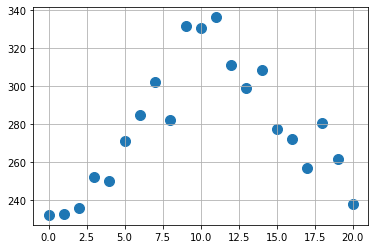

In [43]:
m = 21
x = np.linspace(0, 20, m)
y = dataMicrosoft

%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 100)
plt.grid()

In [44]:
# Definimos la función de precios

def funcion_preciosM(beta, X, y) :
    beta = np.reshape(beta, [7, -1])
    pred = X @ beta
    return ((y - pred).T @ (y - pred))[0][0]

In [45]:
# Construimos la matriz X

ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
x_4 = np.reshape(x**4, [m, -1])
x_5 = np.reshape(x**5, [m, -1])
x_6 = np.reshape(x**6, [m, -1])
X = np.hstack((ones, x_1, x_2, x_3, x_4, x_5, x_6 ))
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00,
        1.6000000e+01, 3.2000000e+01, 6.4000000e+01],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00, 2.7000000e+01,
        8.1000000e+01, 2.4300000e+02, 7.2900000e+02],
       [1.0000000e+00, 4.0000000e+00, 1.6000000e+01, 6.4000000e+01,
        2.5600000e+02, 1.0240000e+03, 4.0960000e+03],
       [1.0000000e+00, 5.0000000e+00, 2.5000000e+01, 1.2500000e+02,
        6.2500000e+02, 3.1250000e+03, 1.5625000e+04],
       [1.0000000e+00, 6.0000000e+00, 3.6000000e+01, 2.1600000e+02,
        1.2960000e+03, 7.7760000e+03, 4.6656000e+04],
       [1.0000000e+00, 7.0000000e+00, 4.9000000e+01, 3.4300000e+02,
        2.4010000e+03, 1.6807000e+04, 1.1764900e+05],
       [1.0000000e+00, 8

In [46]:
beta_inicial = np.random.rand(7)
y = np.reshape(y, [m, -1])
funcion_preciosM(beta_inicial, X, y)

2860376865781221.5

In [47]:
sol = opt.minimize(funcion_preciosM, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 58037.858666362226
 hess_inv: array([[ 4.14415296e-01, -5.14667476e-01,  1.98404560e-01,
        -3.35794346e-02,  2.78851399e-03, -1.11608043e-04,
         1.72125133e-06],
       [-5.14667476e-01,  1.09473301e+00, -4.94682650e-01,
         9.01044909e-02, -7.80131374e-03,  3.20708411e-04,
        -5.03871681e-06],
       [ 1.98404560e-01, -4.94682650e-01,  2.41176155e-01,
        -4.60196459e-02,  4.11232215e-03, -1.72973511e-04,
         2.76525054e-06],
       [-3.35794346e-02,  9.01044909e-02, -4.60196459e-02,
         9.06451696e-03, -8.28897779e-04,  3.54804147e-05,
        -5.75041082e-07],
       [ 2.78851399e-03, -7.80131374e-03,  4.11232215e-03,
        -8.28897779e-04,  7.71326060e-05, -3.34699661e-06,
         5.48436095e-08],
       [-1.11608043e-04,  3.20708411e-04, -1.72973511e-04,
         3.54804147e-05, -3.34699661e-06,  1.46832019e-07,
        -2.42759411e-09],
       [ 1.72125133e-06, -5.03871681e-06,  2.76525054e-06,
        -5.75041082e-07,  5.48436095

In [48]:
y_predM1 = X @ sol.x
y_predM1

array([102.27985264, 231.65218756, 265.10114438, 265.65356784,
       266.71165473, 280.77184157, 306.91053951, 337.03671627,
       360.91132532, 369.93358213, 359.69408752, 331.29479829,
       291.43584479, 251.26919579, 224.01917037, 221.36979704,
       248.6190199 , 298.59975203, 344.36777593, 330.65649115,
       164.09850903])

**Solución y visualización del problema de optimización:**

- Ya obtuvimos el modelo con polinomio de grado 6 `y_predM1`, a continuación vamos a graficar la curva junto con los precios de la acción de Microsoft, para analizar los resultados obtenidos, y determinar si tenemos un sobreajuste.

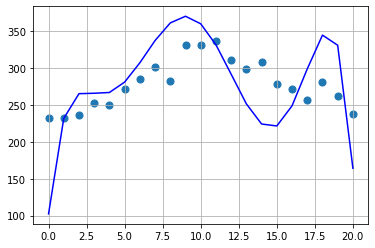

In [49]:
m = 21
x = np.linspace(0, 20, m)
y = dataMicrosoft

%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 50)
plt.plot(x, y_predM1, "b")
plt.grid()

## Análisis de Resultados:

- La curva obtenida del modelo `y_predM1`es similar a la curva del modelo con polinomio de grado 6 de la empresa Apple. La función no se ajusta o no se acerca a la mayoría de los precios de la empresa.

- Por lo que vamos a proponer un modelo con polinomio de grado 5 para ver si se repite el mismo patrón, y para ver si el modelo con polinomio de grado 5 se ajusta mejor a los precios a comparación de este modelo.

**Modelo con polinomio de grado 5**

In [50]:
def funcion_preciosM(beta, X, y) :
    beta = np.reshape(beta, [6, -1])
    pred = X @ beta
    return ((y - pred).T @ (y - pred))[0][0]

In [51]:
# Construimos la matriz X

ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
x_4 = np.reshape(x**4, [m, -1])
x_5 = np.reshape(x**5, [m, -1])
X = np.hstack((ones, x_1, x_2, x_3, x_4, x_5))
X

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+04],
       [1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02,
        6.561000e+03, 5.904

In [52]:
beta_inicial = np.random.rand(6)
y = np.reshape(y, [m, -1])
funcion_preciosM(beta_inicial, X, y)

5488830825752.389

In [53]:
sol = opt.minimize(funcion_preciosM, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 2802.9746802304326
 hess_inv: array([[ 4.15964503e-01, -3.44200574e-01,  8.83915143e-02,
        -9.64767280e-03,  4.69742726e-04, -8.40356040e-06],
       [-3.44200574e-01,  5.08589461e-01, -1.60924361e-01,
         1.96067796e-02, -1.02206795e-03,  1.91551206e-05],
       [ 8.83915143e-02, -1.60924361e-01,  5.54582871e-02,
        -7.10402522e-03,  3.82889280e-04, -7.34967184e-06],
       [-9.64767280e-03,  1.96067796e-02, -7.10402522e-03,
         9.39655219e-04, -5.18082188e-05,  1.01153459e-06],
       [ 4.69742726e-04, -1.02206795e-03,  3.82889280e-04,
        -5.18082188e-05,  2.90488336e-06, -5.74599587e-08],
       [-8.40356039e-06,  1.91551206e-05, -7.34967184e-06,
         1.01153459e-06, -5.74599587e-08,  1.14841143e-09]])
      jac: array([-5.82931519e+00,  5.24353027e+00,  1.39655029e+02,  2.67067773e+03,
        4.96438721e+04,  9.30521986e+05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 397
      nit: 8
     njev: 55

In [54]:
y_predM2 = X @ sol.x
y_predM2

array([236.56466857, 227.28346   , 230.46752038, 241.50461786,
       256.68295588, 273.10870751, 288.6235498 , 301.72219809,
       311.46994037, 317.42017161, 319.53192809, 318.08742172,
       313.60957442, 306.77955239, 298.35430051, 289.08407664,
       279.62998597, 270.48151533, 261.87406757, 253.70649584,
       245.45863797])

**Solución y visualización del problema de optimización:**

- Ahora graficamos el modelo `y_predM2` junto con los precios de Microsoft

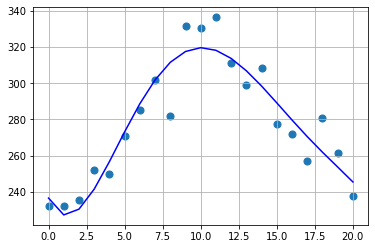

In [55]:
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 50)
plt.plot(x, y_predM2, "b")
plt.grid()

## Análisis de resultados:

- Se repite el mismo patrón que con Apple, parece ser que los mejores modelos que se ajustan a los precios son las funciones de grado 5 o hasta la quinta potencia. Vamos a utilizar un modelo con polinomio de grado 4 para determinar cuál de los dos modelos es el más útil para predecir los precios de la acción de Microsoft, ya que el comportamiento de los modelos es muy similar.

**Modelo con polinomio de grado 4**

In [56]:
def funcion_preciosM(beta, X, y) :
    beta = np.reshape(beta, [5, -1])
    pred = X @ beta
    return ((y - pred).T @ (y - pred))[0][0]

In [57]:
# Construimos la matriz X

ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
x_4 = np.reshape(x**4, [m, -1])
X = np.hstack((ones, x_1, x_2, x_3, x_4))
X

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03],
       [1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03],
       [1.00000e+00, 9.00000e+00, 8.10000e+01, 7.29000e+02, 6.56100e+03],
       [1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04],
       [1.00000e+00, 1.10000e+01, 1.21000e+02, 1.33100e+03, 1.46410e+04],
       [1.00000e+00, 1.20000e+01, 1.44000e+02, 1.72800e+03, 2.07360e+04],
       [1.00000e+00, 1.30000e+01, 1.69

In [58]:
beta_inicial = np.random.rand(5)
y = np.reshape(y, [m, -1])
funcion_preciosM(beta_inicial, X, y)

17996815952.497185

In [59]:
sol = opt.minimize(funcion_preciosM, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 2817.735510079833
 hess_inv: array([[ 3.59315260e-01, -2.07135093e-01,  3.51728137e-02,
        -2.28391792e-03,  5.01417799e-05],
       [-2.07135093e-01,  1.90854970e-01, -3.86745967e-02,
         2.75949355e-03, -6.42492374e-05],
       [ 3.51728137e-02, -3.86745967e-02,  8.49173563e-03,
        -6.35692644e-04,  1.52854141e-05],
       [-2.28391792e-03,  2.75949355e-03, -6.35692644e-04,
         4.90987114e-05, -1.20715456e-06],
       [ 5.01417799e-05, -6.42492374e-05,  1.52854141e-05,
        -1.20715456e-06,  3.01745806e-08]])
      jac: array([-0.00076294, -0.01202393, -0.037323  , -0.02148438, -0.52346802])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 240
      nit: 10
     njev: 38
   status: 2
  success: False
        x: array([ 2.33343556e+02, -6.83983154e+00,  4.75766498e+00, -4.23562617e-01,
        1.02469502e-02])

In [60]:
y_predM3 = X @ sol.x
y_predM3

array([233.34355586, 230.84807363, 235.47000296, 245.03685835,
       257.62208112, 271.54503936, 285.37102801, 297.91126876,
       308.22291015, 315.60902751, 319.61862295, 320.04662542,
       316.93389065, 310.56720118, 301.47926636, 290.44872233,
       278.50013206, 266.90398528, 257.17669857, 251.08061529,
       250.6240056 ])

**Solución y visualización del problema de optimización:**

- Ahora graficamos ambos modelos junto con los precios de la acción de Microsoft

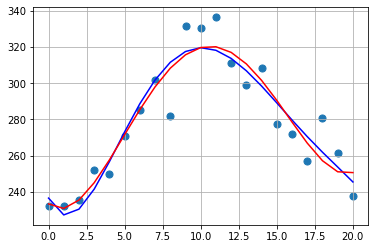

In [61]:
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 50)
plt.plot(x, y_predM2, "b")
plt.plot(x, y_predM3, "r")
plt.grid()

## Análisis de resultados:

- Obtenemos el siguiente gráfico. Los modelos que mejor se ajustan a los precios de Microsoft son los siguientes modelos

1. Modelo `y_predM3`: 
- $ y = 1.02467798e-02x^4 -4.23554640e-01x^3 + 4.75754039e+00x^2 - 6.83912542e+00x + 2.33342650e+02 $

2. Modelo `y_predM2`:
- $ y = -7.25232597e-04x^5 + 4.65200226e-02x^4 - 1.06189303e+00x^3 + 9.39517408e+00x^2 - 1.89430227e+01x + 2.38750704e+02 $

- Al igual que con Apple, los modelos que mejor se ajustan a los precios son modelos con polinomios de grado 5 y 4, por lo que es seguro decir que va a ser similar al proponer modelos con las demás empresas, por lo que directamente vamos a hacer dos modelos para cada empresa que falta.

- **Predicción de precios utilizando el polinomio de grado 4 `y_predM3`**

In [135]:
sp.var('x')
y3 = 1.02467798e-02*x**4 -4.23554640e-01*x**3 + 4.75754039e+00*x**2 - 6.83912542e+00*x + 2.33342650e+02
preciosM1 = y3.subs(x, 21)
preciosM1

258.060789413801

In [136]:
y3 = 1.02467798e-02*x**4 -4.23554640e-01*x**3 + 4.75754039e+00*x**2 - 6.83912542e+00*x + 2.33342650e+02
preciosM2 = y3.subs(x, 22)
preciosM2

275.891281628800

In [137]:
y3 = 1.02467798e-02*x**4 -4.23554640e-01*x**3 + 4.75754039e+00*x**2 - 6.83912542e+00*x + 2.33342650e+02
preciosM3 = y3.subs(x, 23)
preciosM3

306.861432781800

In [138]:
y3 = 1.02467798e-02*x**4 -4.23554640e-01*x**3 + 4.75754039e+00*x**2 - 6.83912542e+00*x + 2.33342650e+02
preciosM4 = y3.subs(x, 24)
preciosM4

353.963176124801

**Obtenemos la siguiente predicción de los precios**
- Octubre = 258.06 USD
- Noviembre = 275.89 USD
- Diciembre = 306.86 USD
- Enero = 353.96 USD

- **Predicción de precios utilizando el polinomio de grado 4 `y_predM2`**

In [145]:
y4 = -7.25232597e-04*x**5 + 4.65200226e-02*x**4 - 1.06189303e+00*x**3 + 9.39517408e+00*x**2 - 1.89430227e+01*x + 2.38750704e+02
preciosM5 = y4.subs(x, 21)
preciosM5

235.364986380302

In [146]:
y4 = -7.25232597e-04*x**5 + 4.65200226e-02*x**4 - 1.06189303e+00*x**3 + 9.39517408e+00*x**2 - 1.89430227e+01*x + 2.38750704e+02
preciosM6 = y4.subs(x, 22)
preciosM6

222.243970723296

In [147]:
y4 = -7.25232597e-04*x**5 + 4.65200226e-02*x**4 - 1.06189303e+00*x**3 + 9.39517408e+00*x**2 - 1.89430227e+01*x + 2.38750704e+02
preciosM7 = y4.subs(x, 23)
preciosM7

203.419669543829

In [148]:
y4 = -7.25232597e-04*x**5 + 4.65200226e-02*x**4 - 1.06189303e+00*x**3 + 9.39517408e+00*x**2 - 1.89430227e+01*x + 2.38750704e+02
preciosM8 = y4.subs(x, 24)
preciosM8

175.601718243074

**Obtenemos la siguiente predicción de los precios**
- Octubre = 235.36 USD
- Noviembre = 222.24 USD
- Diciembre = 203.41 USD
- Enero = 175.60 USD

## Conclusiones 

Apartir de los dos modelos obtenemos dos tendencias, una alcista con el modelo con poliomio de grado 4 `y_predM3`, y una tendencia bajista con el modelo de polinomio de grado 5 `y_predM2`.
Entonces el iversionista tendría que ver cuál gráfica es la que mejor se ajusta a los precios de la acción de Microsoft, o especular y el mismo decidir, haciendo otros tipos de análisis, cuál modelo es el que mejor predice los precios de la acción.

---

# Nike Inc.

Como ya observamos que los modelos con polinomios con grado 5 y 4 son más efectivos y útiles tanto con Apple y Microsoft, vamos a proponer dos modelos de los mismos grados para los precios de la acción de Nike, y predecir los precios de la accíon de Nike para los siguientes 4 meses.

Los datos de los precios de la accción de Nike en los últimos meses se obtuvieron de *Investing.com* y se cotejaron con *Factset* para verificar los datos.

**Modelo que representa el problema:**

Se va a realizar el ajuste de curvas.
Necesitamos las librerías para poder trabajar con ajuste de curvas. Necesitaremos un archivo de excel donde están los precios de la acción de cada empresa y leeremos el archivo de excel utilizando `pandas`. Después vamos a usar `numpy` para ordenar los datos de los precios de las acciones como un arreglo numérico y de esta manera poder trabajar con los datos. Después utilizaremos funciones de python junto con operaciones de álgebra lineal para definir los modelos para realizar el ajuste de curvas. Y al final usaremos `scipy.optimize` para encontrar las betas o los pesos de cada modelo. Y por último usaremos la librería de `matplotlib` para graficar los resultados obtenidos

In [62]:
# Importamos las librerías para trabajar con el ajuste de curvas

import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [63]:
data3 = pd.read_excel('PreciosProyecto1.xlsx')
data3

,Fecha,Precios Apple,Unnamed: 2,Fecha.1,Precios Microsoft,Unnamed: 5,Fecha.2,Precios Nike,Unnamed: 8,Fecha.3,Precios Starbucks,Unnamed: 11,Fecha.4,Precios Tesla
0,01 de enero de 2021,131.96,NaN,01 de enero de 2021,231.96,NaN,01 de enero de 2021,133.59,NaN,01 de enero de 2021,96.81,NaN,01 de enero de 2021,264.51
1,01 de febrero de 2021,121.26,NaN,01 de febrero de 2021,232.38,NaN,01 de febrero de 2021,134.78,NaN,01 de febrero de 2021,108.03,NaN,01 de febrero de 2021,225.17
2,01 de marzo de 2021,122.15,NaN,01 de marzo de 2021,235.77,NaN,01 de marzo de 2021,132.89,NaN,01 de marzo de 2021,109.27,NaN,01 de marzo de 2021,222.64
3,01 de abril de 2021,131.46,NaN,01 de abril de 2021,252.18,NaN,01 de abril de 2021,132.62,NaN,01 de abril de 2021,114.49,NaN,01 de abril de 2021,236.48
4,01 de mayo de 2021,124.61,NaN,01 de mayo de 2021,249.68,NaN,01 de mayo de 2021,136.46,NaN,01 de mayo de 2021,113.88,NaN,01 de mayo de 2021,208.41
5,01 de junio de 2021,136.96,NaN,01 de junio de 2021,270.90,NaN,01 de junio de 2021,154.49,NaN,01 de junio de 2021,111.81,NaN,01 de junio de 2021,226.57
6,01 de julio de 2021,145.86,NaN,01 de julio de 2021,284.91,NaN,01 de julio de 2021,167.51,NaN,01 de julio de 2021,121.43,NaN,01 de julio de 2021,229.07
7,01 de agosto de 2021,151.83,NaN,01 de agosto de 2021,301.88,NaN,01 de agosto de 2021,164.74,NaN,01 de agosto de 2021,117.49,NaN,01 de agosto de 2021,245.24
8,01 de septiembre de 2021,141.50,NaN,01 de septiembre de 2021,281.92,NaN,01 de septiembre de 2021,145.23,NaN,01 de septiembre de 2021,110.31,NaN,01 de septiembre de 2021,258.49
9,01 de octubre de 2021,149.80,NaN,01 de octubre de 2021,331.62,NaN,01 de octubre de 2021,167.29,NaN,01 de octubre de 2021,106.07,NaN,01 de octubre de 2021,371.33


In [64]:
dataNKE = data3['Precios Nike']
dataNKE

0     133.59
1     134.78
2     132.89
3     132.62
4     136.46
5     154.49
6     167.51
7     164.74
8     145.23
9     167.29
10    169.24
11    166.67
12    148.07
13    136.55
14    134.56
15    124.70
16    118.85
17    102.20
18    114.92
19    106.45
20     97.02
Name: Precios Nike, dtype: float64

In [65]:
dataNike = np.array([dataNKE])
dataNike

array([[133.59, 134.78, 132.89, 132.62, 136.46, 154.49, 167.51, 164.74,
        145.23, 167.29, 169.24, 166.67, 148.07, 136.55, 134.56, 124.7 ,
        118.85, 102.2 , 114.92, 106.45,  97.02]])

**Modelo con polinomio de grado 4**

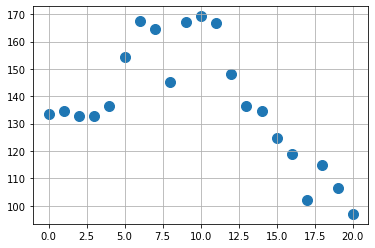

In [66]:
m = len(dataNKE)
x = np.linspace(0, 20, m)
y = dataNike

%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 100)
plt.grid()

- La acción de Nike también parece tener mucha volatilidad

In [67]:
# Creamos función de precios

def funcion_preciosN(beta, X, y) :
    beta = np.reshape(beta, [5, -1])
    pred = X @ beta
    return ((y-pred).T @ (y-pred))[0][0]

In [68]:
# Creamos la matriz X

ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
x_4 = np.reshape(x**4, [m, -1])
X = np.hstack((ones, x_1, x_2, x_3, x_4))
X

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03],
       [1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03],
       [1.00000e+00, 9.00000e+00, 8.10000e+01, 7.29000e+02, 6.56100e+03],
       [1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04],
       [1.00000e+00, 1.10000e+01, 1.21000e+02, 1.33100e+03, 1.46410e+04],
       [1.00000e+00, 1.20000e+01, 1.44000e+02, 1.72800e+03, 2.07360e+04],
       [1.00000e+00, 1.30000e+01, 1.69

In [69]:
beta_inicial = np.random.rand(5)
y = np.reshape(y, [m, -1])
funcion_preciosN(beta_inicial, X, y)

41485830232.14474

In [70]:
sol = opt.minimize(funcion_preciosN, 
                   beta_inicial, 
                   args = (X, y))
sol

      fun: 1080.5005348320442
 hess_inv: array([[ 3.54094212e-01, -2.04176798e-01,  3.46671639e-02,
        -2.25074907e-03,  4.94065180e-05],
       [-2.04176798e-01,  1.88346471e-01, -3.81467080e-02,
         2.72035890e-03, -6.33097752e-05],
       [ 3.46671639e-02, -3.81467080e-02,  8.37294217e-03,
        -6.26604969e-04,  1.50633166e-05],
       [-2.25074907e-03,  2.72035890e-03, -6.26604969e-04,
         4.83939832e-05, -1.18980249e-06],
       [ 4.94065180e-05, -6.33097752e-05,  1.50633166e-05,
        -1.18980249e-06,  2.97456135e-08]])
      jac: array([-3.37219238e-03, -2.41394043e-02, -3.56201172e-01, -6.29248047e+00,
       -1.14361679e+02])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 342
      nit: 9
     njev: 55
   status: 2
  success: False
        x: array([ 1.33016068e+02, -3.82587565e+00,  2.58206218e+00, -2.58740826e-01,
        6.77889473e-03])

In [71]:
y_predN1 = X @ sol.x
y_predN1

array([133.016068  , 131.52029261, 133.73110115, 138.34008887,
       144.20154451, 150.33245027, 155.91248181, 160.28400829,
       162.95209232, 163.58449001, 162.01165092, 158.22671809,
       152.38552803, 144.80661073, 135.97118966, 126.52318174,
       117.2691974 , 109.1785405 , 103.3832084 , 101.17789193,
       104.0199754 ])

**Modelo con polinomio de grado 5**

In [72]:
# Creamos función de precios

def funcion_preciosN(beta, X, y) :
    beta = np.reshape(beta, [6, -1])
    pred = X @ beta
    return ((y-pred).T @ (y-pred))[0][0]

In [73]:
# Creamos la matriz X

ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
x_4 = np.reshape(x**4, [m, -1])
x_5 = np.reshape(x**5, [m, -1])
X = np.hstack((ones, x_1, x_2, x_3, x_4, x_5))
X

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+04],
       [1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02,
        6.561000e+03, 5.904

In [74]:
beta_inicial = np.random.rand(6)
y = np.reshape(y, [m, -1])
funcion_preciosN(beta_inicial, X, y)

19221814739835.926

In [75]:
sol = opt.minimize(funcion_preciosN, 
                   beta_inicial, 
                   args = (X, y))
sol

      fun: 1028.9009630151177
 hess_inv: array([[ 4.15419043e-01, -3.43455103e-01,  8.81905463e-02,
        -9.62627640e-03,  4.68743701e-04, -8.38640268e-06],
       [-3.43455103e-01,  5.01326671e-01, -1.58266485e-01,
         1.92682918e-02, -1.00411264e-03,  1.88162166e-05],
       [ 8.81905463e-02, -1.58266485e-01,  5.44682671e-02,
        -6.97669234e-03,  3.76088620e-04, -7.22065173e-06],
       [-9.62627640e-03,  1.92682918e-02, -6.97669234e-03,
         9.23183677e-04, -5.09249187e-05,  9.94724562e-07],
       [ 4.68743701e-04, -1.00411264e-03,  3.76088620e-04,
        -5.09249187e-05,  2.85737738e-06, -5.65538149e-08],
       [-8.38640267e-06,  1.88162166e-05, -7.22065173e-06,
         9.94724562e-07, -5.65538149e-08,  1.13109625e-09]])
      jac: array([ 3.50952148e-04, -2.54821777e-03, -6.55670166e-02, -1.34973145e+00,
       -2.65209961e+01, -5.10203339e+02])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 334
      nit: 13
     njev: 4

In [76]:
y_predN2 = X @ sol.x
y_predN2

array([139.23002798, 128.4136888 , 128.17171643, 134.14334942,
       142.9384988 , 152.03675037, 159.68636724, 164.80329214,
       166.87014989, 165.83524982, 162.01158814, 155.97585039,
       148.46741384, 140.2873499 , 132.19742656, 124.81911078,
       118.53257088, 113.37567901, 108.94301354, 104.28486145,
        97.80622078])

**Solución y visualización del problema de optimización:**

- Graficamos ambos modelos junto con los precios de la acción de Nike

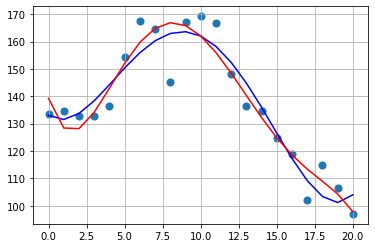

In [77]:
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 50)
plt.plot(x, y_predN1, "b")
plt.plot(x, y_predN2, "r")
plt.grid()

## Análisis de resultados:

En el caso de Nike, nosotros determuinamos que el modelo que mejor se ajusta a los precios de la acción de Nike es el modelo `y_predN2`que es el modelo con polinomio de grado 5 (*la curva de color rojo*). Se acerca a más puntos de la gráfica, por lo que nosotros consideramos que es el modelo más representativo para esta empresa

- **Predicción de precios utilizando el modelo `y_predN2`**

In [152]:
sp.var('x')
y5 = -8.41646551e-04*x**5 + 4.88611497e-02*x**4 - 9.98919305e-01*x**3 + 7.95453797e+00*x**2 - 1.78199773e+01*x + 1.39230028e+02
preciosN1 = y5.subs(x, 21)
preciosN1

87.1658000850493

In [154]:
sp.var('x')
y5 = -8.41646551e-04*x**5 + 4.88611497e-02*x**4 - 9.98919305e-01*x**3 + 7.95453797e+00*x**2 - 1.78199773e+01*x + 1.39230028e+02
preciosN2 = y5.subs(x, 22)
preciosN2

69.1750314399669

In [156]:
sp.var('x')
y5 = -8.41646551e-04*x**5 + 4.88611497e-02*x**4 - 9.98919305e-01*x**3 + 7.95453797e+00*x**2 - 1.78199773e+01*x + 1.39230028e+02
preciosN3 = y5.subs(x, 23)
preciosN3

39.6970584897044

In [157]:
sp.var('x')
y5 = -8.41646551e-04*x**5 + 4.88611497e-02*x**4 - 9.98919305e-01*x**3 + 7.95453797e+00*x**2 - 1.78199773e+01*x + 1.39230028e+02
preciosN3 = y5.subs(x, 24)
preciosN3

-6.45425244262606

---

# Starbucks Corp.

Como ya observamos que los modelos con polinomios con grado 5 y 4 son más efectivos y útiles tanto con Apple, Microsoft y Nike. Vamos a proponer dos modelos de los mismos grados para los precios de la acción de Starbucks, y predecir los precios de la accíon de Starbucks para los siguientes 4 meses.

Los datos de los precios de la accción de Starbucks en los últimos meses se obtuvieron de *Investing.com* y se cotejaron con *Factset* para verificar los datos.

**Modelo que representa el problema:**

Se va a realizar el ajuste de curvas.
Necesitamos las librerías para poder trabajar con ajuste de curvas. Necesitaremos un archivo de excel donde están los precios de la acción de cada empresa y leeremos el archivo de excel utilizando `pandas`. Después vamos a usar `numpy` para ordenar los datos de los precios de las acciones como un arreglo numérico y de esta manera poder trabajar con los datos. Después utilizaremos funciones de python junto con operaciones de álgebra lineal para definir los modelos para realizar el ajuste de curvas. Y al final usaremos `scipy.optimize` para encontrar las betas o los pesos de cada modelo. Y por último usaremos la librería de `matplotlib` para graficar los resultados obtenidos

In [78]:
# Importamos las librerías para trabajar con ajuste de curvas

import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [79]:
data4 = pd.read_excel('PreciosProyecto1.xlsx')
data4

,Fecha,Precios Apple,Unnamed: 2,Fecha.1,Precios Microsoft,Unnamed: 5,Fecha.2,Precios Nike,Unnamed: 8,Fecha.3,Precios Starbucks,Unnamed: 11,Fecha.4,Precios Tesla
0,01 de enero de 2021,131.96,NaN,01 de enero de 2021,231.96,NaN,01 de enero de 2021,133.59,NaN,01 de enero de 2021,96.81,NaN,01 de enero de 2021,264.51
1,01 de febrero de 2021,121.26,NaN,01 de febrero de 2021,232.38,NaN,01 de febrero de 2021,134.78,NaN,01 de febrero de 2021,108.03,NaN,01 de febrero de 2021,225.17
2,01 de marzo de 2021,122.15,NaN,01 de marzo de 2021,235.77,NaN,01 de marzo de 2021,132.89,NaN,01 de marzo de 2021,109.27,NaN,01 de marzo de 2021,222.64
3,01 de abril de 2021,131.46,NaN,01 de abril de 2021,252.18,NaN,01 de abril de 2021,132.62,NaN,01 de abril de 2021,114.49,NaN,01 de abril de 2021,236.48
4,01 de mayo de 2021,124.61,NaN,01 de mayo de 2021,249.68,NaN,01 de mayo de 2021,136.46,NaN,01 de mayo de 2021,113.88,NaN,01 de mayo de 2021,208.41
5,01 de junio de 2021,136.96,NaN,01 de junio de 2021,270.90,NaN,01 de junio de 2021,154.49,NaN,01 de junio de 2021,111.81,NaN,01 de junio de 2021,226.57
6,01 de julio de 2021,145.86,NaN,01 de julio de 2021,284.91,NaN,01 de julio de 2021,167.51,NaN,01 de julio de 2021,121.43,NaN,01 de julio de 2021,229.07
7,01 de agosto de 2021,151.83,NaN,01 de agosto de 2021,301.88,NaN,01 de agosto de 2021,164.74,NaN,01 de agosto de 2021,117.49,NaN,01 de agosto de 2021,245.24
8,01 de septiembre de 2021,141.50,NaN,01 de septiembre de 2021,281.92,NaN,01 de septiembre de 2021,145.23,NaN,01 de septiembre de 2021,110.31,NaN,01 de septiembre de 2021,258.49
9,01 de octubre de 2021,149.80,NaN,01 de octubre de 2021,331.62,NaN,01 de octubre de 2021,167.29,NaN,01 de octubre de 2021,106.07,NaN,01 de octubre de 2021,371.33


In [80]:
dataSBUX = data4['Precios Starbucks']
dataSBUX

0      96.81
1     108.03
2     109.27
3     114.49
4     113.88
5     111.81
6     121.43
7     117.49
8     110.31
9     106.07
10    109.64
11    116.97
12     98.32
13     91.79
14     90.97
15     74.64
16     78.50
17     76.39
18     84.78
19     84.07
20     84.17
Name: Precios Starbucks, dtype: float64

In [81]:
dataStarbucks = np.array([dataSBUX])
dataStarbucks

array([[ 96.81, 108.03, 109.27, 114.49, 113.88, 111.81, 121.43, 117.49,
        110.31, 106.07, 109.64, 116.97,  98.32,  91.79,  90.97,  74.64,
         78.5 ,  76.39,  84.78,  84.07,  84.17]])

- Graficamos los precios de la acción de Starbucks

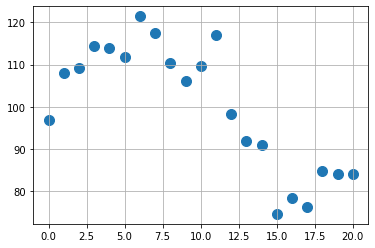

In [82]:
m = len(dataSBUX)
x = np.linspace(0, 20, m)
y = dataStarbucks

%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 100)
plt.grid()

- La acción de Starbucks presenta mucha volatilidad

**Modelo con polinomio de grado 4**

In [83]:
# Definimos la función de precios

def funcion_preciosS(beta, X, y) :
    beta = np.reshape(beta, [5, -1])
    pred = X @ beta
    return ((y-pred).T @ (y-pred))[0][0]

In [84]:
# Creamos la matriz X

ones = np.ones([m, 1])
x1 = np.reshape(x, [m, -1])
x2 = np.reshape(x**2, [m, -1])
x3 = np.reshape(x**3, [m, -1])
x4 = np.reshape(x**4, [m, -1])
X = np.hstack((ones, x1, x2, x3, x4))
X

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03],
       [1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03],
       [1.00000e+00, 9.00000e+00, 8.10000e+01, 7.29000e+02, 6.56100e+03],
       [1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04],
       [1.00000e+00, 1.10000e+01, 1.21000e+02, 1.33100e+03, 1.46410e+04],
       [1.00000e+00, 1.20000e+01, 1.44000e+02, 1.72800e+03, 2.07360e+04],
       [1.00000e+00, 1.30000e+01, 1.69

In [85]:
beta_inicial = np.random.rand(5)
y = np.reshape(y, [m, -1])
funcion_preciosS(beta_inicial, X, y)

73868553849.92358

In [86]:
sol = opt.minimize(funcion_preciosS, 
                   beta_inicial, 
                   args = (X, y))
sol

      fun: 463.77243632964735
 hess_inv: array([[ 3.54666343e-01, -2.03550049e-01,  3.44757677e-02,
        -2.23492757e-03,  4.90062219e-05],
       [-2.03550049e-01,  1.89036326e-01, -3.83574460e-02,
         2.73778633e-03, -6.37507971e-05],
       [ 3.44757677e-02, -3.83574460e-02,  8.43713584e-03,
        -6.31904980e-04,  1.51972987e-05],
       [-2.23492757e-03,  2.73778633e-03, -6.31904980e-04,
         4.88311719e-05, -1.20084805e-06],
       [ 4.90062219e-05, -6.37507971e-05,  1.51972987e-05,
        -1.20084805e-06,  3.00245763e-08]])
      jac: array([-2.23159790e-03, -1.44195557e-03,  3.15895081e-02,  5.43991089e-01,
        9.89784622e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 240
      nit: 10
     njev: 38
   status: 2
  success: False
        x: array([ 9.95472187e+01,  5.03777231e+00, -1.03139684e-01, -5.38191470e-02,
        2.24286237e-03])

In [87]:
y_predS1 = X @ sol.x
y_predS1

array([ 99.54721869, 104.43027503, 108.81553719, 112.46083335,
       115.17782035, 116.83198375, 117.34263782, 116.6829255 ,
       114.87981844, 112.01411699, 108.22045019, 103.68727577,
        98.65688018,  93.42537855,  88.3427147 ,  83.81266117,
        80.29281918,  78.29461865,  78.3833182 ,  81.17800514,
        87.35159549])

**Modelo con polinomio de grado 5**

In [88]:
# Definimos la función de precios

def funcion_preciosS(beta, X, y) :
    beta = np.reshape(beta, [6, -1])
    pred = X @ beta
    return ((y-pred).T @ (y-pred))[0][0]

In [89]:
# Creamos la matriz X

ones = np.ones([m, 1])
x1 = np.reshape(x, [m, -1])
x2 = np.reshape(x**2, [m, -1])
x3 = np.reshape(x**3, [m, -1])
x4 = np.reshape(x**4, [m, -1])
x5 = np.reshape(x**5, [m, -1])
X = np.hstack((ones, x1, x2, x3, x4, x5))
X

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+04],
       [1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02,
        6.561000e+03, 5.904

In [90]:
beta_inicial = np.random.rand(6)
y = np.reshape(y, [m, -1])
funcion_preciosS(beta_inicial, X, y)

404969463077.28827

In [91]:
sol = opt.minimize(funcion_preciosS, 
                   beta_inicial, 
                   args = (X, y))
sol

      fun: 502.75318747621384
 hess_inv: array([[ 4.68849874e-01, -4.04016971e-01,  1.05595993e-01,
        -1.16348843e-02,  5.69763777e-04, -1.02318274e-05],
       [-4.04016971e-01,  5.75766196e-01, -1.80603023e-01,
         2.19195978e-02, -1.14015914e-03,  2.13390153e-05],
       [ 1.05595993e-01, -1.80603023e-01,  6.13146890e-02,
        -7.80023704e-03,  4.18738504e-04, -8.01690862e-06],
       [-1.16348843e-02,  2.19195978e-02, -7.80023704e-03,
         1.02305604e-03, -5.61259557e-05,  1.09221989e-06],
       [ 5.69763777e-04, -1.14015914e-03,  4.18738504e-04,
        -5.61259557e-05,  3.12925306e-06, -6.16641752e-08],
       [-1.02318274e-05,  2.13390153e-05, -8.01690862e-06,
         1.09221989e-06, -6.16641752e-08,  1.22734457e-09]])
      jac: array([1.36753082e+00, 7.49664688e+00, 2.56797562e+01, 3.30434631e+02,
       6.13553529e+03, 1.14116727e+05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 404
      nit: 7
     njev: 56
   st

In [92]:
y_predS2 = X @ sol.x
y_predS2

array([100.74588779, 103.47125186, 107.46290794, 111.64799354,
       115.2353739 , 117.68646175, 118.68603692, 118.11306604,
       116.01152222, 112.56120474, 108.04855873, 102.83749481,
        97.34020882,  91.98800148,  87.20209804,  83.36446801,
        80.78864482,  79.69054548,  80.15929027,  82.12802242,
        85.34472783])

**Solución y visualización del problema de optimización:**

- Graficamos los modelos junto con los precios de la acción de Starbucks

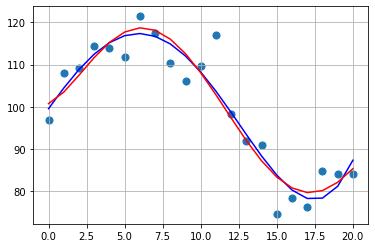

In [93]:
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 50)
plt.plot(x, y_predS1, "b")
plt.plot(x, y_predS2, "r")
plt.grid()

## Análisis de resultados:

- Ambos modelos parecen ajustarse en la misma magnitud a los precios de la acción de Starbucks. Siendo el modelo de grado 4 la curva azul `y_predS1` y el modelo de grado 5 la curva roja `y_predS2`. Por lo que ambos pueden ser modelos representativos y nos pueden ser útiles para la predicción de los precios de la empresa.

---

# Tesla Inc.

Como ya observamos que los modelos con polinomios con grado 5 y 4 son más efectivos y útiles tanto con Apple, Microsoft, Nike y Starbucks. Vamos a proponer dos modelos de los mismos grados para los precios de la acción de Tesla, y predecir los precios de la accíon de Tesla para los siguientes 4 meses.

Los datos de los precios de la accción de Tesla en los últimos meses se obtuvieron de *Investing.com* y se cotejaron con *Factset* para verificar los datos.

**Modelo que representa el problema:**

Se va a realizar el ajuste de curvas.
Necesitamos las librerías para poder trabajar con ajuste de curvas. Necesitaremos un archivo de excel donde están los precios de la acción de cada empresa y leeremos el archivo de excel utilizando `pandas`. Después vamos a usar `numpy` para ordenar los datos de los precios de las acciones como un arreglo numérico y de esta manera poder trabajar con los datos. Después utilizaremos funciones de python junto con operaciones de álgebra lineal para definir los modelos para realizar el ajuste de curvas. Y al final usaremos `scipy.optimize` para encontrar las betas o los pesos de cada modelo. Y por último usaremos la librería de `matplotlib` para graficar los resultados obtenidos

In [94]:
# Importamos las librerías para trabajar con ajuste de curvas

import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [95]:
data5 = pd.read_excel('PreciosProyecto1.xlsx')
data5

,Fecha,Precios Apple,Unnamed: 2,Fecha.1,Precios Microsoft,Unnamed: 5,Fecha.2,Precios Nike,Unnamed: 8,Fecha.3,Precios Starbucks,Unnamed: 11,Fecha.4,Precios Tesla
0,01 de enero de 2021,131.96,NaN,01 de enero de 2021,231.96,NaN,01 de enero de 2021,133.59,NaN,01 de enero de 2021,96.81,NaN,01 de enero de 2021,264.51
1,01 de febrero de 2021,121.26,NaN,01 de febrero de 2021,232.38,NaN,01 de febrero de 2021,134.78,NaN,01 de febrero de 2021,108.03,NaN,01 de febrero de 2021,225.17
2,01 de marzo de 2021,122.15,NaN,01 de marzo de 2021,235.77,NaN,01 de marzo de 2021,132.89,NaN,01 de marzo de 2021,109.27,NaN,01 de marzo de 2021,222.64
3,01 de abril de 2021,131.46,NaN,01 de abril de 2021,252.18,NaN,01 de abril de 2021,132.62,NaN,01 de abril de 2021,114.49,NaN,01 de abril de 2021,236.48
4,01 de mayo de 2021,124.61,NaN,01 de mayo de 2021,249.68,NaN,01 de mayo de 2021,136.46,NaN,01 de mayo de 2021,113.88,NaN,01 de mayo de 2021,208.41
5,01 de junio de 2021,136.96,NaN,01 de junio de 2021,270.90,NaN,01 de junio de 2021,154.49,NaN,01 de junio de 2021,111.81,NaN,01 de junio de 2021,226.57
6,01 de julio de 2021,145.86,NaN,01 de julio de 2021,284.91,NaN,01 de julio de 2021,167.51,NaN,01 de julio de 2021,121.43,NaN,01 de julio de 2021,229.07
7,01 de agosto de 2021,151.83,NaN,01 de agosto de 2021,301.88,NaN,01 de agosto de 2021,164.74,NaN,01 de agosto de 2021,117.49,NaN,01 de agosto de 2021,245.24
8,01 de septiembre de 2021,141.50,NaN,01 de septiembre de 2021,281.92,NaN,01 de septiembre de 2021,145.23,NaN,01 de septiembre de 2021,110.31,NaN,01 de septiembre de 2021,258.49
9,01 de octubre de 2021,149.80,NaN,01 de octubre de 2021,331.62,NaN,01 de octubre de 2021,167.29,NaN,01 de octubre de 2021,106.07,NaN,01 de octubre de 2021,371.33


In [96]:
dataTSLA = data5['Precios Tesla']
dataTSLA

0     264.51
1     225.17
2     222.64
3     236.48
4     208.41
5     226.57
6     229.07
7     245.24
8     258.49
9     371.33
10    381.59
11    352.26
12    312.24
13    290.14
14    359.20
15    290.25
16    252.75
17    224.47
18    297.15
19    275.61
20    282.80
Name: Precios Tesla, dtype: float64

In [97]:
dataTesla = np.array([dataTSLA])
dataTesla

array([[264.51, 225.17, 222.64, 236.48, 208.41, 226.57, 229.07, 245.24,
        258.49, 371.33, 381.59, 352.26, 312.24, 290.14, 359.2 , 290.25,
        252.75, 224.47, 297.15, 275.61, 282.8 ]])

- Graficamos los precios de las acciones de Tesla

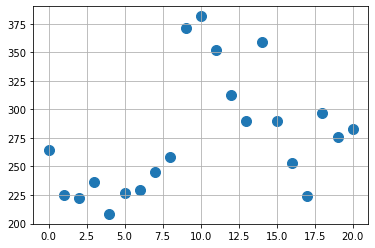

In [98]:
m = len(dataTSLA)
x = np.linspace(0, 20, m)
y = dataTesla

%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 100)
plt.grid()

**Modelo con polinomio de grado 4**

In [99]:
# Definimos la función de precios

def funcion_preciosT(beta, X, y) :
    beta = np.reshape(beta, [5, -1])
    pred = X @ beta
    return ((y-pred).T @ (y-pred))[0][0]

In [100]:
# Creamos la matriz X

ones = np.ones([m, 1])
x1 = np.reshape(x, [m, -1])
x2 = np.reshape(x**2, [m, -1])
x3 = np.reshape(x**3, [m, -1])
x4 = np.reshape(x**4, [m, -1])
X = np.hstack((ones, x1, x2, x3, x4))
X

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03],
       [1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03],
       [1.00000e+00, 9.00000e+00, 8.10000e+01, 7.29000e+02, 6.56100e+03],
       [1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03, 1.00000e+04],
       [1.00000e+00, 1.10000e+01, 1.21000e+02, 1.33100e+03, 1.46410e+04],
       [1.00000e+00, 1.20000e+01, 1.44000e+02, 1.72800e+03, 2.07360e+04],
       [1.00000e+00, 1.30000e+01, 1.69

In [101]:
beta_inicial = np.random.rand(5)
y = np.reshape(y, [m, -1])
funcion_preciosT(beta_inicial, X, y)

2403725698.6878753

In [102]:
sol = opt.minimize(funcion_preciosT, 
                   beta_inicial, 
                   args = (X, y))
sol

      fun: 18858.790208584316
 hess_inv: array([[ 3.56773260e-01, -2.05141778e-01,  3.47182866e-02,
        -2.24798230e-03,  4.92388422e-05],
       [-2.05141778e-01,  1.88977058e-01, -3.82162725e-02,
         2.72223730e-03, -6.32999095e-05],
       [ 3.47182866e-02, -3.82162725e-02,  8.38280336e-03,
        -6.27024891e-04,  1.50677741e-05],
       [-2.24798230e-03,  2.72223730e-03, -6.27024891e-04,
         4.84199312e-05, -1.19029676e-06],
       [ 4.92388422e-05, -6.32999095e-05,  1.50677741e-05,
        -1.19029676e-06,  2.97590923e-08]])
      jac: array([ 0.00341797,  0.02929688,  0.12597656, -0.05688477,  0.23974609])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 240
      nit: 9
     njev: 38
   status: 2
  success: False
        x: array([ 2.78129305e+02, -6.57753269e+01,  1.70107260e+01, -1.29436129e+00,
        3.04968331e-02])

In [103]:
y_predT1 = X @ sol.x
y_predT1

array([278.12930481, 228.1008394 , 204.75461387, 201.42234644,
       212.16767933, 231.78617876, 255.80533494, 280.48456207,
       302.81519837, 320.52050602, 332.0556712 , 336.60780412,
       334.09593893, 325.17103382, 311.21597094, 294.34555647,
       277.40652055, 263.97751733, 258.36912496, 265.62384557,
       291.5161053 ])

**Modelo con polinomio de grado 5**

In [104]:
# Definimos la función de precios

def funcion_preciosT(beta, X, y) :
    beta = np.reshape(beta, [6, -1])
    pred = X @ beta
    return ((y-pred).T @ (y-pred))[0][0]

In [105]:
# Creamos la matriz X

ones = np.ones([m, 1])
x1 = np.reshape(x, [m, -1])
x2 = np.reshape(x**2, [m, -1])
x3 = np.reshape(x**3, [m, -1])
x4 = np.reshape(x**4, [m, -1])
x5 = np.reshape(x**5, [m, -1])
X = np.hstack((ones, x1, x2, x3, x4, x5))
X

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+04],
       [1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02,
        6.561000e+03, 5.904

In [106]:
beta_inicial = np.random.rand(6)
y = np.reshape(y, [m, -1])
funcion_preciosT(beta_inicial, X, y)

2434912713169.2036

In [107]:
sol = opt.minimize(funcion_preciosT, 
                   beta_inicial, 
                   args = (X, y))
sol

      fun: 18051.39295043571
 hess_inv: array([[ 4.18430290e-01, -3.42576528e-01,  8.75227822e-02,
        -9.52442236e-03,  4.62850623e-04, -8.26920430e-06],
       [-3.42576528e-01,  5.03667798e-01, -1.59764479e-01,
         1.95133907e-02, -1.01923553e-03,  1.91325311e-05],
       [ 8.75227822e-02, -1.59764479e-01,  5.54272395e-02,
        -7.13314296e-03,  3.85722558e-04, -7.42191302e-06],
       [-9.52442236e-03,  1.95133907e-02, -7.13314296e-03,
         9.48721578e-04, -5.24984673e-05,  1.02761558e-06],
       [ 4.62850623e-04, -1.01923553e-03,  3.85722558e-04,
        -5.24984673e-05,  2.95439199e-06, -5.85826807e-08],
       [-8.26920430e-06,  1.91325311e-05, -7.42191302e-06,
         1.02761558e-06, -5.85826807e-08,  1.17354328e-09]])
      jac: array([-2.63940430e+00, -2.75441895e+01, -4.15971436e+02, -6.84954980e+03,
       -1.25912468e+05, -2.33575664e+06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 383
      nit: 7
     njev: 53


In [108]:
y_predT2 = X @ sol.x
y_predT2

array([268.83148744, 232.38552926, 212.73649304, 207.57157911,
       214.16454628, 229.51813706, 250.50650285, 274.01762916,
       297.09576082, 317.08382721, 331.7658674 , 339.50945546,
       339.40812558, 331.42379734, 316.52920087, 296.85030212,
       275.808728  , 258.26419165, 250.6569176 , 261.15006703,
       299.77216292])

**Solución y visualización del problema de optimización:**

- Ahora graficamos ambos modelos junto con los precios de la acción de Tesla

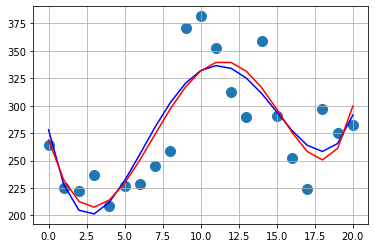

In [109]:
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 100)
plt.plot(x, y_predT1, "b")
plt.plot(x, y_predT2, "r")
plt.grid()

## Análisis de resultados:

- Ambos modelos parecen ajustarse en la misma magnitud a los precios de la acción de Tesla. Siendo el modelo de grado 4 la curva azul `y_predT1` y el modelo de grado 5 la curva roja `y_predT2`. Por lo que ambos pueden ser modelos representativos y nos pueden ser útiles para la predicción de los precios de la empresa.

---

# Conclusiones:

Podemos ver que según las predicciones, los precios y tienen una tendencia alcista o bajista, pero son contínuas. Esto se debe a que en nuestro modelo solo tenemos dos variables $x$ y $y$, para hacer una predicción precisa tendríamos que tener en cuenta variables como el riesgo. Aparte de que el comportamiento de la bolsa llega a ser impredecible, y también influyen factores externos del mercado de acciones como tal, por ejemplo la guerra entre Rusia y Ucrania, todos esos factores influyen en los precios de las acciones de las empresas.

Después de hacer el proceso de ajuste de curvas de las 5 empresas, encontramos que los modelos que mejor se ajustan a los precios de las empresas son modelos con polinomios de grados 4 y 5. Esto quiere decir, que, si un inversionista decide usar ajuste de curvas para predecir el precio de la acción de una empresa, utilizando los precios al cierre de cada mes, para decidir si le conviene comprar o vender acciones de una empresa, podría empezar usando este proceso con modelos de grado 4 y 5.

Nosotros consideramos que el ajuste de curvas puede ser una herramienta útil para la predicción de los precios de las empresas, pero hay más opciones y métodos para que un inversionista pueda tomar desiciones acerca de sus inversiones. Si se decide utilziar el ajuste de curvas, recomendamos que se utilicen los precios al cierre de cada día, con un plazo del último año para tener más precisión en nuestras predicciones. Pero necesitaría modelos con polinomios de mayor grado debido a que la cantidad de precios es mayor.

Los inversionistas también podrían usar modelos de mayor grado, pero según nuestros resultados, estos modelos si se ajustarían a los precios de las acciones, pero según el modelo de grado 7 que propusimos para Apple, el modelo pierde precisión después de ajustarse al último precio de Apple, y después la función decrece de manera continua, por lo que no serviría para predecir los siguientes precios de la acción de una empresa, ya que el precio de la acción de esa empresa debería de desplomarse por completo y para que suceda eso tendría que haber un evento extraordinario o que se de un evento muy difícil de predecir, por ejemplo, la guerra entre Rusia y Ucrania.

---

# Referencias:

- FactSet. (s. f.). Recuperado 26 de septiembre de 2022, de factset.com
- (Apple Historical Price Data (AAPL), 2022): Apple Historical Price Data (AAPL). (2022, 26 septiembre). Investing.com. Recuperado 26 de septiembre de 2022, de https://www.investing.com/equities/apple-computer-inc-historical-data
- (Microsoft Historical Price Data (MSFT), 2022): Microsoft Historical Price Data (MSFT). (2022, 26 septiembre). Investing.com. Recuperado 26 de septiembre de 2022, de https://www.investing.com/equities/microsoft-corp-historical-data
- (Nike Historical Price Data (NKE), 2022): Nike Historical Price Data (NKE). (2022, 26 septiembre). Investing.com. Recuperado 26 de septiembre de 2022, de https://www.investing.com/equities/nike-historical-data
- (Starbucks Historical Price Data (SBUX), 2022): Starbucks Historical Price Data (SBUX). (2022, 26 septiembre). Investing.com. Recuperado 26 de septiembre de 2022, de https://www.investing.com/equities/starbucks-corp-historical-data
- (Tesla Historical Price Data (TSLA), 2022) : Tesla Historical Price Data (TSLA). (2022, 26 septiembre). Investing.com. Recuperado 26 de septiembre de 2022, de https://www.investing.com/equities/tesla-motors-historical-data
- (NYSE, s. f.): NYSE. (s. f.). Recuperado 26 de septiembre de 2022, de https://www.nyse.com/quote/XNGS:AAPL
- (NYSE, s. f.): NYSE. (s. f.-b). Recuperado 26 de septiembre de 2022, de https://www.nyse.com/quote/XNGS:MSFT
- (NYSE, s. f.): NYSE. (s. f.-c). Recuperado 26 de septiembre de 2022, de https://www.nyse.com/quote/XNYS:NKE
- (NYSE, s. f.): NYSE. (s. f.-d). Recuperado 26 de septiembre de 2022, de https://www.nyse.com/quote/XNGS:SBUX
- (NYSE, s. f.): NYSE. (s. f.-e). Recuperado 26 de septiembre de 2022, de https://www.nyse.com/quote/XNGS:TSLA

---